## Load library

In [3]:
# load library
from datetime import datetime
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report


## Load data

In [4]:
# load data
csv_file = "Data/creditcard.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
Credit_card = pd.DataFrame(csv_data)

## Data process

In [5]:
Credit_card.groupby('Class')[['Class']].count()

,Class
Class,
0,284315
1,492


In [6]:
# scale time and amount

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

Credit_card['scaled_amount'] = rob_scaler.fit_transform(Credit_card['Amount'].values.reshape(-1,1))
Credit_card['scaled_time'] = rob_scaler.fit_transform(Credit_card['Time'].values.reshape(-1,1))

In [7]:
Credit_card.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = Credit_card['scaled_amount']
scaled_time = Credit_card['scaled_time']

Credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
Credit_card.insert(0, 'scaled_amount', scaled_amount)
Credit_card.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

Credit_card.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
df_x = Credit_card.iloc[:,:-1]
Class = Credit_card.iloc[:,-1]
## Randomly split the data
X_train, X_test, y_train, y_test = train_test_split(df_x, Class, test_size=0.2, random_state=3)

In [8]:
len(y_test)

56962

## XGB model

In [9]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.8461538461538461
Accuracy rate:  0.9995084442259752


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.77      0.85       100

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
Columns_name = list(X_train.columns)
# feature_importances_  
importances = clf.feature_importances_
print("Importances：",importances)
# Change into dataframe for easier further maniputation 
Columns_name = pd.DataFrame(Columns_name)
importances= pd.DataFrame(importances)
# rename
Columns_name.rename(columns={0:'Columns name'},inplace = True)
importances.rename(columns={0:'importances'},inplace = True)

df_import = pd.concat([Columns_name,importances], axis=1)

Importances： [0.01263058 0.01633259 0.02373566 0.01360122 0.02144281 0.0305224
 0.01857734 0.01563578 0.02650291 0.0189287  0.01225543 0.05385268
 0.01569386 0.02416494 0.019588   0.06004884 0.01895406 0.01719481
 0.38603067 0.02419632 0.01306598 0.01592358 0.01893477 0.01130698
 0.01467286 0.0152871  0.01373813 0.02444574 0.02947123 0.0132639 ]


In [14]:
# Order the important from higher values to smaller values
df_import = df_import.sort_values(by ='importances',ascending = False)
df_import.iloc[0:10,]

,Columns name,importances
18,V17,0.386031
15,V14,0.060049
11,V10,0.053853
5,V4,0.030522
28,V27,0.029471
8,V7,0.026503
27,V26,0.024446
19,V18,0.024196
13,V12,0.024165
2,V1,0.023736


In [15]:
df_importance_show = df_import.iloc[0:10,]

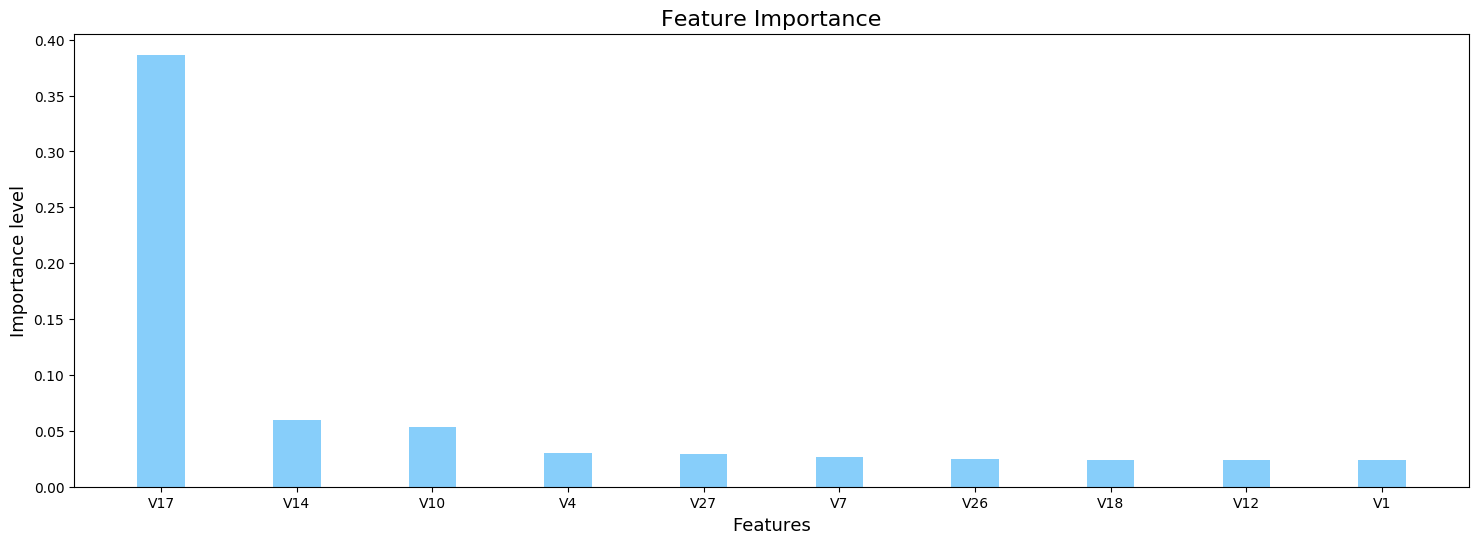

In [18]:
# Create 18 x 6 windows and set the dpi = 100
plt.figure(figsize=(18, 6), dpi=100)
# Create 1 x 1 graph
plt.subplot(1, 1, 1)
# bar number
N = 10
# each bar's value
values = df_importance_show['importances']
# include the Number for bars
index = np.arange(N)
# bar width
width = 0.35
# set the bar color
p2 = plt.bar(index, values, width, color="#87CEFA")
#set the x label
plt.xlabel('Features',fontsize = 13)
# set y label
plt.ylabel('Importance level',fontsize = 13)
# set title
plt.title('Feature Importance',fontsize = 16)
# set the ticks
plt.xticks(index, df_importance_show['Columns name'])
plt.show()

### XGB model performance

In [31]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    pred_prob = clf.predict_proba(features_test)
    accuracy = accuracy_score(labels_test, pred)
    cnf_matrix=confusion_matrix(labels_test,pred)

    fig= plt.figure(figsize=(6,3))# to plot the graph
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    
    
    print("TPR for the two class", TPR)
    print("TNR for the two class", TNR)
    print("FPR for the two class", FPR)
    print("FNR for the two class", FNR)
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("Accuracy:", accuracy)
    print("Confusion matrix:",cnf_matrix)
    
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))


TPR for the two class [0.99991207 0.77      ]
TNR for the two class [0.77       0.99991207]
FPR for the two class [2.30000000e-01 8.79321867e-05]
FNR for the two class [8.79321867e-05 2.30000000e-01]
TP 77
TN 56857
FP 5
FN 23


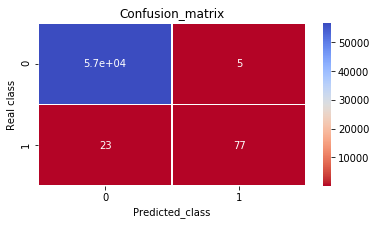

Accuracy: 0.9995084442259752
Confusion matrix: [[56857     5]
 [   23    77]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.77      0.85       100

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

_________________________________________________________________________________________


In [23]:
#the partion for whole data
print()
model(XGBClassifier(),X_train, X_test, y_train, y_test)
# here training for the undersample data but tatsing for whole data
print("_________________________________________________________________________________________")

## DGB model

In [12]:
model_GDB = GradientBoostingClassifier()
model_GDB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:

y_pred = model_GDB.predict(X_test)
y_pred_proba = model_GDB.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.6193548387096774
Accuracy rate:  0.9989642217618764


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.87      0.48      0.62       100

    accuracy                           1.00     56962
   macro avg       0.94      0.74      0.81     56962
weighted avg       1.00      1.00      1.00     56962



### Conclusion for DGB model: its average model performance is not so good. 


## Do further exploration on XGB model.

### Random UnderSampling technique on XGB model
#### purpose: avoid imbalance data and hope increasing the accracy in fraud case

In [32]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827953 0.00172047]
[0.99824444 0.00175556]


In [33]:
Credit_card = Credit_card.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = Credit_card.loc[Credit_card['Class'] == 1]
non_fraud_df = Credit_card.loc[Credit_card['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
223900,0.001118,0.691714,2.005042,-0.378692,-1.421355,-0.027702,0.283375,0.052051,-0.124195,-0.011909,...,-0.147245,0.114357,0.568401,-0.009595,0.289037,0.236333,0.171623,-0.034141,-0.067199,0
93788,-0.307413,-0.236222,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,...,-0.172659,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,1
16295,0.097813,-0.669674,1.236986,-0.166139,0.090760,0.185506,-0.026162,0.335124,-0.199717,0.052244,...,0.035273,-0.099764,-0.077329,-0.265990,-0.738330,0.682727,0.721433,-0.037730,-0.009590,0
88897,-0.292042,-0.262585,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,...,-0.286043,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1
8296,-0.293440,-0.864813,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


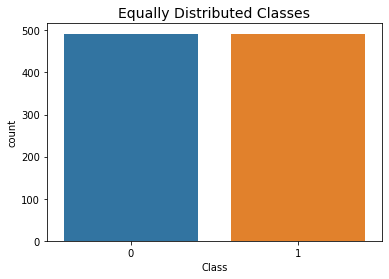

In [34]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Use new dataset and train XGB

In [35]:
X_train_new = new_df.iloc[:,:-1]
y_train_new = new_df.iloc[:,-1]

In [37]:
clf_new = XGBClassifier()
clf_new.fit(X_train_new, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:

y_pred = clf_new.predict(X_test)
y_pred_proba = clf_new.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.10649627263045792
Accuracy rate:  0.9705417646852288


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.06      1.00      0.11       100

    accuracy                           0.97     56962
   macro avg       0.53      0.99      0.55     56962
weighted avg       1.00      0.97      0.98     56962




TPR for the two class [0.97048996 1.        ]
TNR for the two class [1.         0.97048996]
FPR for the two class [0.         0.02951004]
FNR for the two class [0.02951004 0.        ]
TP 100
TN 55184
FP 1678
FN 0


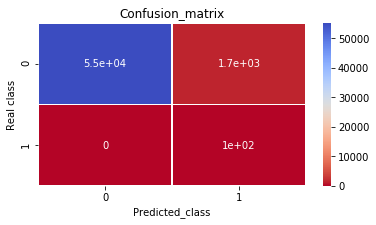

Accuracy: 0.9705417646852288
Confusion matrix: [[55184  1678]
 [    0   100]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.06      1.00      0.11       100

    accuracy                           0.97     56962
   macro avg       0.53      0.99      0.55     56962
weighted avg       1.00      0.97      0.98     56962

_________________________________________________________________________________________


In [41]:
#the partion for whole data
print()
model(XGBClassifier(),X_train_new, X_test, y_train_new, y_test)
# here training for the undersample data but tatsing for whole data
print("_________________________________________________________________________________________")

### Conclusion: Cannot get a good result by using RUS

### Random overSampling technique on XGB model

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [43]:
## Randomly split the data
X_train, X_test, y_train, y_test = train_test_split(df_x, Class, test_size=0.2, random_state=3)

# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [44]:
y1 = pd.DataFrame(y_train)

In [45]:
y1.groupby('Class')[['Class']].count()

,Class
Class,
0,227453
1,227453


In [46]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.8133971291866028
Accuracy rate:  0.9993153330290369


In [21]:
print(classification_report(y_test, y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.999736  0.999578  0.999657     56862
           1   0.779817  0.850000  0.813397       100

    accuracy                       0.999315     56962
   macro avg   0.889776  0.924789  0.906527     56962
weighted avg   0.999350  0.999315  0.999330     56962




TPR for the two class [0.99945482 0.86      ]
TNR for the two class [0.86       0.99945482]
FPR for the two class [0.14       0.00054518]
FNR for the two class [0.00054518 0.14      ]
TP 86
TN 56831
FP 31
FN 14


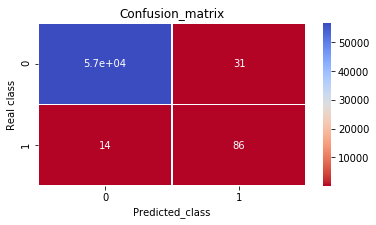

Accuracy: 0.9992099996488887
Confusion matrix: [[56831    31]
 [   14    86]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.74      0.86      0.79       100

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

_________________________________________________________________________________________


In [47]:
#the partion for whole data
print()
model(XGBClassifier(),X_train, X_test, y_train, y_test)
# here training for the undersample data but tatsing for whole data
print("_________________________________________________________________________________________")

### Conclusion: the result shows that after using ROC, our model performance looks great.

## Turn XGB model performace parameter based on cross validation

In [41]:
## Set the initial parameter
model = XGBClassifier(learning_rate=0.300000012,
                      n_estimators=100,           
                      max_depth=6,               
                      min_child_weight = 1,      
                      gamma=0.,                  
                      subsample= 1,                   
                      scale_pos_weight=1,        
                      random_state=0,
                      )

In [42]:
param_test = {
    'n_estimators': list(range(100, 300,100)),
    'max_depth': list(range(5, 8, 1)),
    'learning_rate':  [0.1,0.2,0.300000012]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_test, 
scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.0,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=None, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=1,
                          

### Warning: if you want to run the code chunk below. You should run about 2 hours

In [43]:
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([ 41.53203907,  89.56298556,  48.91545844,  87.71751547,
          50.78208756, 101.66982293,  37.0730566 ,  70.72200685,
          43.20697765,  79.13098245,  47.95204   ,  89.08022237,
          34.14792237,  66.0519372 ,  40.33389707,  74.13720574,
          45.15862498,  82.62068501]),
  'std_fit_time': array([ 1.2152014 , 10.43434933,  5.3316885 ,  2.47876532,  2.21768201,
          3.7613283 ,  3.21737596,  5.59384889,  2.00858052,  0.50610887,
          0.56939002,  1.31210661,  0.31774497,  0.4369143 ,  0.63402898,
          1.26438456,  0.36187056,  1.99139073]),
  'mean_score_time': array([0.19448767, 0.29588227, 0.18104491, 0.28310313, 0.17785764,
         0.31260161, 0.16355901, 0.24713173, 0.17718859, 0.25891294,
         0.19072585, 0.28387289, 0.16009808, 0.23981962, 0.16760445,
         0.24911146, 0.18172922, 0.28073945]),
  'std_score_time': array([0.01993381, 0.02081845, 0.01386962, 0.02705434, 0.00358533,
         0.02052486, 0.00867536, 0.0

In [9]:
clf = XGBClassifier(learning_rate=0.2,
                      n_estimators=200,           
                      max_depth= 7,               
                      min_child_weight = 1,      
                      gamma=0.,                  
                      subsample= 1,                   
                      scale_pos_weight=1,        
                      random_state=0,         
                      )
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.8351648351648352
Accuracy rate:  0.9994733330992591


In [11]:
print(classification_report(y_test, y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.999578  0.999894  0.999736     56862
           1   0.926829  0.760000  0.835165       100

    accuracy                       0.999473     56962
   macro avg   0.963204  0.879947  0.917451     56962
weighted avg   0.999450  0.999473  0.999447     56962



In [12]:
Columns_name = list(X_train.columns)
# feature_importances_  
importances = clf.feature_importances_
print("Importances：",importances)
# Change into dataframe for easier further maniputation 
Columns_name = pd.DataFrame(Columns_name)
importances= pd.DataFrame(importances)
# rename
Columns_name.rename(columns={0:'Columns name'},inplace = True)
importances.rename(columns={0:'importances'},inplace = True)

df_import = pd.concat([Columns_name,importances], axis=1)

Importances： [0.01185079 0.0164804  0.02294668 0.01860358 0.01998427 0.02782559
 0.01676363 0.01568776 0.02497988 0.01877984 0.01457585 0.05414674
 0.01325168 0.02295587 0.01585524 0.06602052 0.01659271 0.01401856
 0.40744814 0.01752073 0.0146598  0.01708733 0.01985602 0.01065473
 0.01284759 0.01249018 0.00966335 0.02156753 0.03236542 0.01251957]


In [13]:
# Order the important from higher values to smaller values
df_import = df_import.sort_values(by ='importances',ascending = False)
df_import.iloc[0:10,]

,Columns name,importances
18,V17,0.407448
15,V14,0.066021
11,V10,0.054147
28,V27,0.032365
5,V4,0.027826
8,V7,0.024980
13,V12,0.022956
2,V1,0.022947
27,V26,0.021568
4,V3,0.019984
